<a href="https://colab.research.google.com/github/SaniyaBubere/ML_Regression_Retails_Sales_Prediction/blob/main/ML_Regression_Retails_sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#**Problem** **Description**
# Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.
# You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

## <b> Data Description </b>

### <b>Rossmann Stores Data.csv </b> - historical data including Sales
### <b>store.csv </b> - supplemental information about the stores


### <b><u>Data fields</u></b>
### Most of the fields are self-explanatory. The following are descriptions for those that aren't.

* #### Id - an Id that represents a (Store, Date) duple within the test set
* #### Store - a unique Id for each store
* #### Sales - the turnover for any given day (this is what you are predicting)
* #### Customers - the number of customers on a given day
* #### Open - an indicator for whether the store was open: 0 = closed, 1 = open
* #### StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* #### SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
* #### StoreType - differentiates between 4 different store models: a, b, c, d
* #### Assortment - describes an assortment level: a = basic, b = extra, c = extended
* #### CompetitionDistance - distance in meters to the nearest competitor store
* #### CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* #### Promo - indicates whether a store is running a promo on that day
* #### Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* #### Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* #### PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

# 1st Jan 2013 to 31 july 2015

import plotly_express as px
fig = px.area(df, x='dates', y='count')
fig.show()

rms

In [1]:
#mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


IMPORT MODULES

In [2]:
#importing all libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

LOADING THE DATASETS

In [3]:
#loading Rossmann Data as df1
df1=pd.read_csv('/content/drive/MyDrive/Rossmann Stores Data.csv')

In [4]:
#loading Store Data as df2
df2=pd.read_csv('/content/drive/MyDrive/store.csv')

In [5]:
#1st 5 rows of df1
df1.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [6]:
#1st 5 rows of df2
df2.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [7]:
#Statistical Info
df1.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


 There is No Null Values in Rossmann Dataset


In [8]:
#Statistical Info
df2.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


There is Missing Values in Columns(Competition Distance ,Competition open since month,Competition open since year  ,Promo2 since week and Promo2 since year in Store Dataset

In [9]:
#datatype of attributes of Rossman Dataset
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [10]:
#datatype of attributes of Store Dataset
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [11]:
#check unique value in Rossman dataset
count=df1[['Store','DayOfWeek','Date','Sales','Customers','Open','Promo','StateHoliday','SchoolHoliday']].nunique()
print("Unique value count:\n",count)

Unique value count:
 Store             1115
DayOfWeek            7
Date               942
Sales            21734
Customers         4086
Open                 2
Promo                2
StateHoliday         5
SchoolHoliday        2
dtype: int64


In [12]:
#check unique value in Store dataset
count2=df2[['Store','StoreType','Assortment','CompetitionDistance','CompetitionOpenSinceMonth','CompetitionOpenSinceYear','Promo2','Promo2SinceWeek','Promo2SinceYear','PromoInterval']].nunique()
print("Unique Values Count Fro Datase 2:\n",count2)

Unique Values Count Fro Datase 2:
 Store                        1115
StoreType                       4
Assortment                      3
CompetitionDistance           654
CompetitionOpenSinceMonth      12
CompetitionOpenSinceYear       23
Promo2                          2
Promo2SinceWeek                24
Promo2SinceYear                 7
PromoInterval                   3
dtype: int64


Preprocessing the datasets

In [13]:
#Checking Null Values in Rossman Dataset
df1.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

* There is No Null Value in Rossman Dataset

In [14]:
#checking null value in Store Dataset
df2.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

* There are Six Columns with Null Values/Missing Values are as follow:
* CompetitionDistance- distance in meters to the nearest competitor store

* CompetitionOpenSinceMonth- gives the approximate month of the time the nearest competitor was opened   
* CompetitionOpenSinceYear-  gives the approximate year of the time the nearest competitor was opened   
* Promo2SinceWeek, Promo2SinceYear and PromoInterval  

In [15]:
# Checking if any Duplicate values are present in the Rossman Dataset
df1.duplicated().sum()

0

There is No Duplicates in Rossman Dataset

In [16]:
# Checking if any Duplicate values are present in the Store Dataset
df2.duplicated().sum()

0

There is No Duplicates in Store Dataset

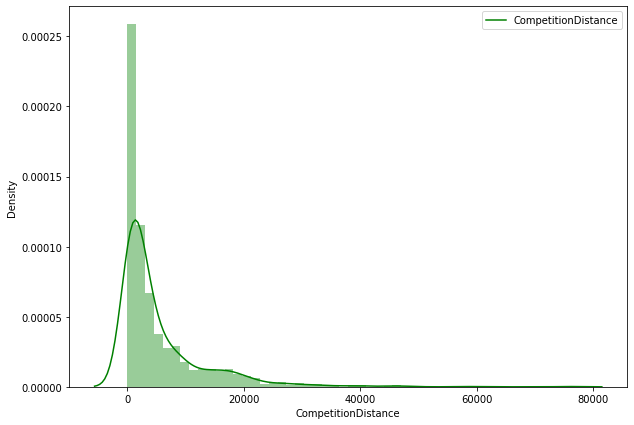

In [17]:
plt.figure(figsize=(10,7))
sns.distplot(df2['CompetitionDistance'],color = 'green')
plt.legend(['CompetitionDistance'])
plt.show()

From the above Plot we can see that the CompetitionDistance is Positively Skewed

In [18]:
#checking mean 
Checking_Mean=df2['CompetitionDistance'].mean()
Checking_Mean 

5404.901079136691

In [19]:
#checking median
Checking_Median=df2['CompetitionDistance'].median()
Checking_Median

2325.0

In [20]:
#checking mode
Checking_Mode=df2['CompetitionDistance'].mode()
Checking_Mode

0    250.0
dtype: float64

In [21]:
#Filling Nan Values With Median 
df2['CompetitionDistance'].fillna(Checking_Median,inplace=True)
#Checking that Nan Value is Replaced or Not
df2['CompetitionDistance'].isnull().value_counts()

False    1115
Name: CompetitionDistance, dtype: int64

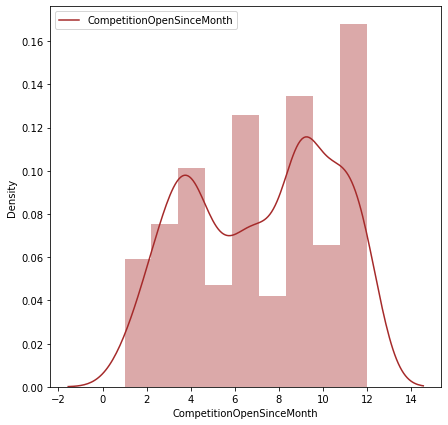

In [22]:
plt.figure(figsize=(7,7))
sns.distplot(df2['CompetitionOpenSinceMonth'],color = 'brown')
plt.legend(['CompetitionOpenSinceMonth'])
plt.show()

From the Above Plot We Can Say That The CompetitionOpenSinceMonth is Left Skewed





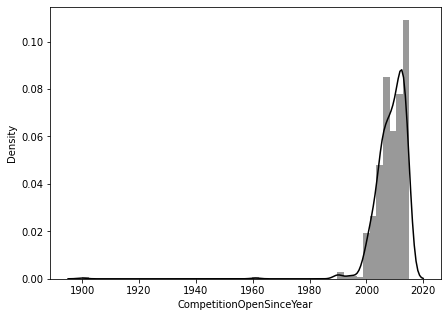

In [23]:
plt.figure(figsize=(7,5))
sns.distplot(df2['CompetitionOpenSinceYear'],color='black')
plt.show()

From the Above Plot We Can Say That The CompetitionOpenSinceYear is Left Skewed


In [24]:
#Checking Means
mean_CompetitionOpenSinceMonth_Year=df2[['CompetitionOpenSinceMonth','CompetitionOpenSinceYear']].mean()
mean_CompetitionOpenSinceMonth_Year

CompetitionOpenSinceMonth       7.224704
CompetitionOpenSinceYear     2008.668857
dtype: float64

In [25]:
#Checking Median
median_CompetitionOpenSinceMonth_Year=df2[['CompetitionOpenSinceMonth','CompetitionOpenSinceYear']].median()
median_CompetitionOpenSinceMonth_Year

CompetitionOpenSinceMonth       8.0
CompetitionOpenSinceYear     2010.0
dtype: float64

In [26]:
#Checking Mode
Mode_CompetitionOpenSinceMonth_Year=df2[['CompetitionOpenSinceMonth','CompetitionOpenSinceYear']].mode()
Mode_CompetitionOpenSinceMonth_Year

,CompetitionOpenSinceMonth,CompetitionOpenSinceYear
0,9.0,2013.0


In [27]:
#Replacing the Null values with suitable value
df2['CompetitionOpenSinceMonth'].fillna(df2['CompetitionOpenSinceMonth'].mode()[0],inplace=True)

In [28]:
#Replacing the Null Values with suitable value
df2['CompetitionOpenSinceYear'].fillna(df2['CompetitionOpenSinceYear'].mode()[0],inplace=True)

In [29]:
## Replacing the Null values with suitable value
df2[['Promo2SinceWeek','Promo2SinceYear']]=df2[['Promo2SinceWeek','Promo2SinceYear']].replace(np.nan,0)

In [30]:

df2['PromoInterval']=df2['PromoInterval'].replace(np.nan,"0")

Promo2SinceWeek, Promo2SinceYear and PromoInterval are NaN wherever Promo2 is 0 or False as can be seen in the first look of the dataset. They can be replaced with 0.

In [31]:
df2.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1115 non-null   float64
 4   CompetitionOpenSinceMonth  1115 non-null   float64
 5   CompetitionOpenSinceYear   1115 non-null   float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            1115 non-null   float64
 8   Promo2SinceYear            1115 non-null   float64
 9   PromoInterval              1115 non-null   object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


Hurreyy Now We Don't have any Null Value in Our Dataset

Merging Both DataSets

In [32]:
#merging both dataset
df=df1.merge(df2)

In [33]:
#checking merge df
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0


In [34]:
#checking null values in merged df
df.isnull().sum()

Store                        0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [35]:
#Checking Unique Value of all Columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1017209 non-null  float64
 12  CompetitionOpenSinceMonth  1017209 non-null  float64
 13  CompetitionO

In [36]:
print(df.Store.min())
print(df.Store.max())

1
1115


In [37]:
print(df.DayOfWeek.min())
print(df.DayOfWeek.max())

1
7


In [38]:
print(df.Date.min())
print(df.Date.max())

2013-01-01
2015-07-31


In [39]:
print(df.Sales.min())
print(df.Sales.max())

0
41551


In [40]:
print(df.Customers.min())
print(df.Customers.max())

0
7388


In [41]:
print(df.Open.min())
print(df.Open.max())

0
1


In [42]:
print(df.Promo.min())
print(df.Promo.max())

0
1


In [43]:
df.StateHoliday.unique()

array(['0', 'a', 'b', 'c', 0], dtype=object)

In [44]:
df.SchoolHoliday.unique()

array([1, 0])

In [45]:
df.StoreType.unique()

array(['c', 'a', 'd', 'b'], dtype=object)

In [46]:
df.sort_values(by=['StoreType'],inplace=True)

In [47]:
df.Assortment.unique()

array(['a', 'c', 'b'], dtype=object)

In [48]:
df.sort_values(by=['Assortment'],inplace=True)

In [49]:
print(df.CompetitionDistance.min())
print(df.CompetitionDistance.max())

20.0
75860.0


In [50]:
print(df.CompetitionOpenSinceMonth.min())
print(df.CompetitionOpenSinceMonth.max())

1.0
12.0


In [51]:
print(df.CompetitionOpenSinceYear.min())
print(df.CompetitionOpenSinceYear.max())

1900.0
2015.0


In [52]:
df.Promo2.unique()

array([0, 1])

In [53]:
print(df.Promo2SinceWeek.min())
print(df.Promo2SinceWeek.max())

0.0
50.0


In [54]:
df.Promo2SinceYear.unique()

array([   0., 2013., 2011., 2014., 2015., 2010., 2012., 2009.])

In [55]:
df.PromoInterval.unique()

array(['0', 'Mar,Jun,Sept,Dec', 'Jan,Apr,Jul,Oct', 'Feb,May,Aug,Nov'],
      dtype=object)

# Distribution of diffrent StoreType

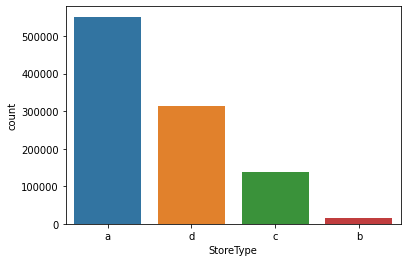

In [56]:
sns.countplot(df['StoreType'])

Text(0.5, 1.0, 'Boxplot For Sales Values with respect to Store Type')

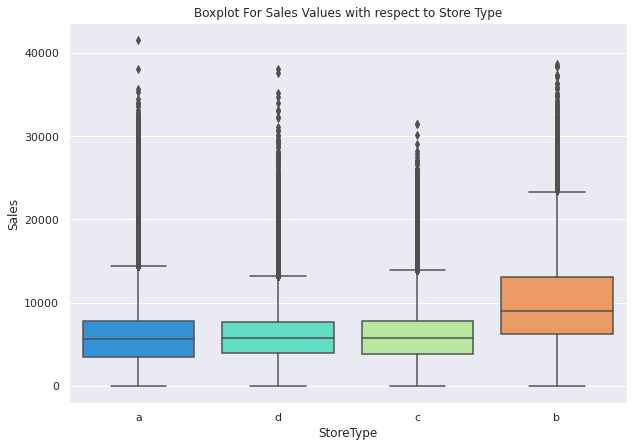

In [57]:
#Average Sales Per Store
sns.set(rc={'figure.figsize':(10,7)})
sns.boxplot(x="StoreType", y="Sales", data=df,palette='rainbow')
plt.title('Boxplot For Sales Values with respect to Store Type')

# Distribution of Assortment Type and Average sales

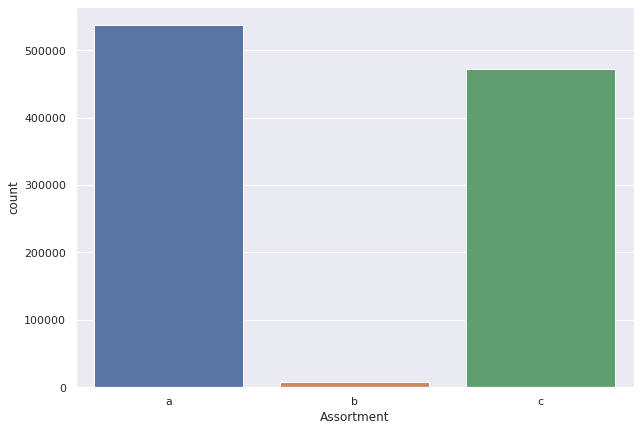

In [58]:
sns.countplot(df['Assortment'])

Text(0.5, 1.0, 'Boxplot for the effect of Assortment Type on sales')

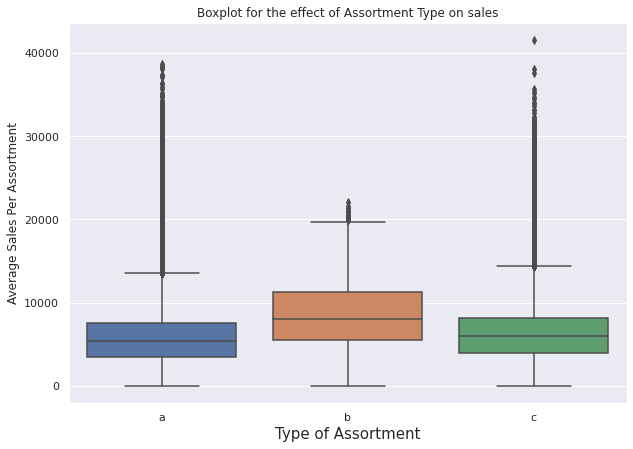

In [59]:
plt.figure(figsize=(10,7))
sns.boxplot(x="Assortment",y="Sales",data=df)
plt.xlabel("Type of Assortment",size=15)
plt.ylabel("Average Sales Per Assortment")
plt.title("Boxplot for the effect of Assortment Type on sales")



# **Impact of School Holiday on Sales**

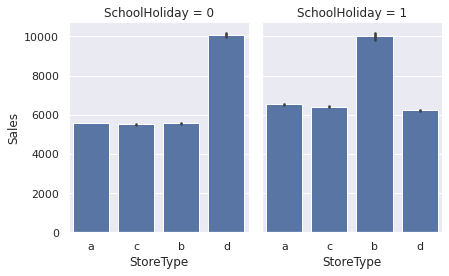

In [60]:
g = sns.FacetGrid(df, col="SchoolHoliday", height=4, aspect=.8)
g.map(sns.barplot, "StoreType", "Sales");

# **Impact of Sales w.r.t Promo , Assortments & StoreType**

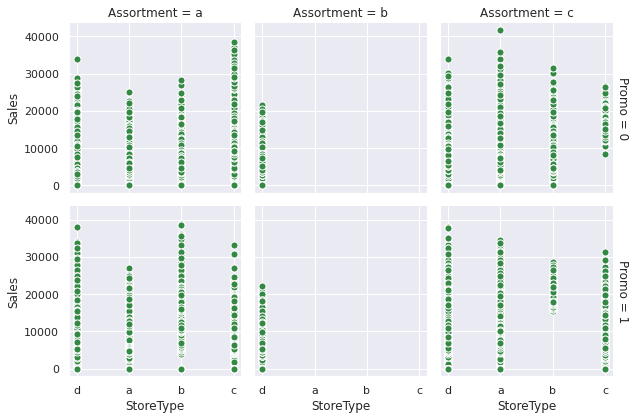

In [61]:
g = sns.FacetGrid(df, col="Assortment", row="Promo", margin_titles=True, height=3)
g.map(plt.scatter,  "StoreType","Sales", color="#338844", edgecolor="white", s=50, lw=1)
# g.set(xlim=(0, 50), ylim=(0, 100));

# **Impact on Sales w.r.t Promo**

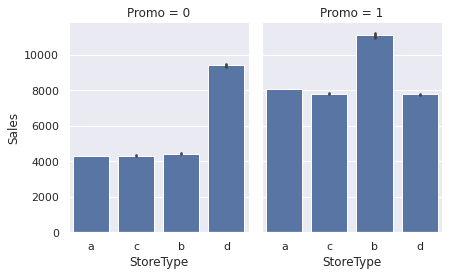

In [62]:
g = sns.FacetGrid(df, col="Promo", height=4, aspect=.8)
g.map(sns.barplot, "StoreType", "Sales");

# **Open And Close Relation on the basis of Weeks**

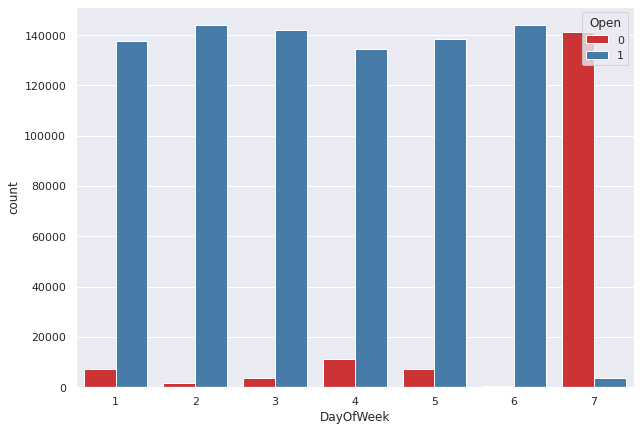

In [63]:
#Open_DayOfWeek
sns.countplot( x='DayOfWeek', data=df, hue="Open", palette="Set1");

### Almost all the stores are closed at the weekend

# **Week wise Sales on the basis of Assortment and Promotions**

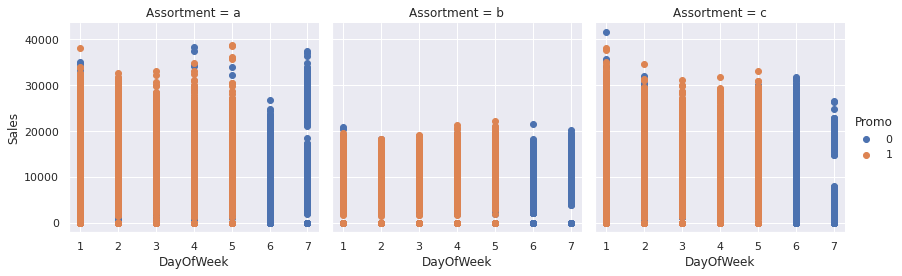

In [64]:
g = sns.FacetGrid(df, hue="Promo", col="Assortment", height=4)
g.map(plt.scatter,"DayOfWeek","Sales")
g.add_legend();


Yeh wale week yeh assortment type p promotion lagate h to itna sales raise hota hai

# **Long Promotion w.r.t Week of Store type and its Sales**

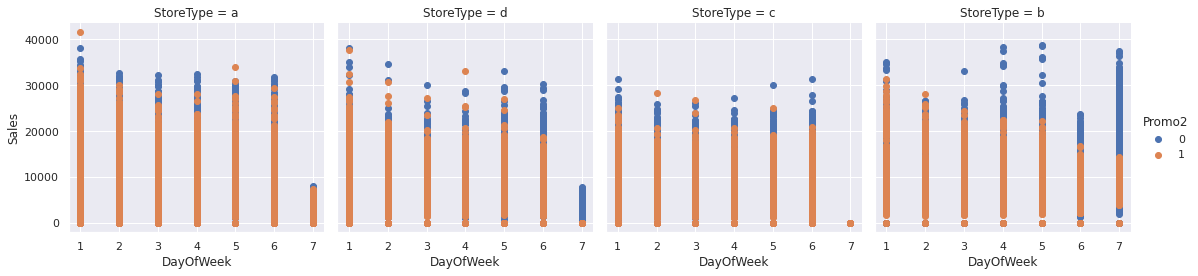

In [65]:
g = sns.FacetGrid(df, hue="Promo2", col="StoreType", height=4)
g.map(plt.scatter,"DayOfWeek","Sales")
g.add_legend();

# **Which day of the week has maximum sales?**

In [66]:
# plt.figure(figsize=(8, 6))
# plt.title('Daily Sales by Day of the Week')
# sns.countplot(df['DayOfWeek'])

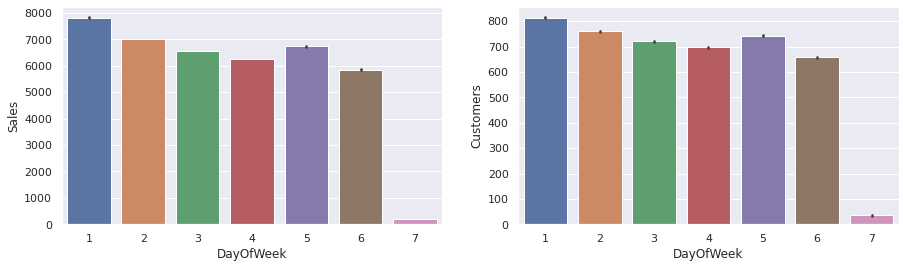

In [67]:

# DayOfWeek
# In both cases where the store is closed and opened

fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))

sns.barplot(x='DayOfWeek', y='Sales', data=df, order=[1,2,3,4,5,6,7], ax=axis1)
sns.barplot(x='DayOfWeek', y='Customers', data=df, order=[1,2,3,4,5,6,7], ax=axis2)

Ans: Sales is highest on Saturdays probably because it is the weekend. Interestingly,Tuesdays is a close second.Mondays is the lowest in sales, probably because it is start of the working week.

In [68]:
#Sales_Open
# sns.set()
# plt.hist(df[df['Open'] == 1].Sales, color='green', label = 'YES') 
# plt.hist(df[df['Open'] == 0].Sales, color='red', label = 'NO')
# plt.legend()
# plt.plot()

Nothing's strange. As that no red bars appeares, that does mean the store doesn't have any sales when the store is closed which is reasonable

In [69]:
# #Sales_Stores
# plt.figure(figsize=(12, 8))
# plt.scatter(df['Store'],df['Sales']);
# plt.plot()

We can see that only several stores have sales more than 20000, and there are quite a lot of 0 sales days. This may be an indication to the days when the stores were closed. Deleting these points later would be better for forcasting well

In [70]:

# fig, (axis1,axis2) = plt.subplots(2,1,figsize=(15,8))

# # Plot max, min values, & 2nd, 3rd quartile
# sns.boxplot([df["Customers"]], whis=np.inf, ax=axis1)

# # Plot sales values 
# # Notice that values with 0 is mostly because the store was closed
# df["Sales"].plot(kind='hist',bins=70,xlim=(0,15000),ax=axis2)

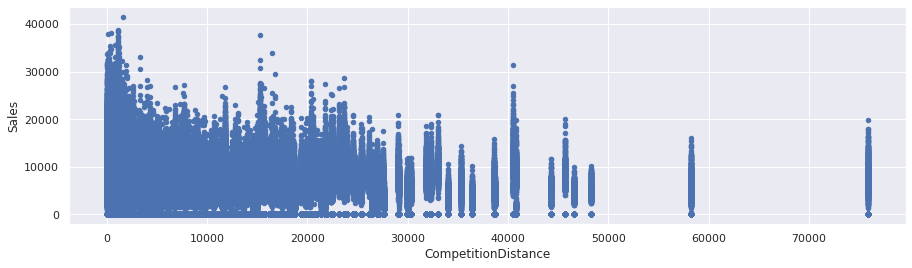

In [71]:

# CompetitionDistance
# Plot CompetitionDistance Vs Sales
df.plot(kind='scatter',x='CompetitionDistance',y='Sales',figsize=(15,4))
# df.plot(kind='kde',x='CompetitionDistance',y='Sales',figsize=(15,4))

In [72]:
# i1=df.groupby(['Store'])['Promo2'].mean()


# plt.rcParams['figure.figsize'] = (6, 7)

# cc1=list(['no','yes'])
# cc2=df.groupby('Store')['Promo2'].mean()*100
# plt.bar(cc1,cc2)

# plt.title(" Percentage of people leaving", fontsize = 20)
# plt.xlabel('Voice mail plan', fontsize = 15)
# plt.ylabel('percentage', fontsize = 15)
# plt.show()

# Converting StateHoliday to Numeric Value 

In [73]:
df.StateHoliday.unique()

array(['0', 'b', 0, 'a', 'c'], dtype=object)

In [74]:
#replacing
df['StateHoliday']=df['StateHoliday'].replace(['0'],0)

0 is in String formate so we have to replace it with int dtype

In [75]:
df["StateHoliday"].replace({"a": 1, "b": 1,"c":1}, inplace=True)

In [76]:
df.StateHoliday.unique()

array([0, 1])

In [77]:
df['StateHoliday'].dtypes

dtype('int64')

## In this we have converted the a,b & c with 1,2 & 3

# Converting StoreType to Numeric Data 

In [78]:
df['StoreType'].unique()

array(['a', 'd', 'c', 'b'], dtype=object)

In [79]:
# df['StoreType'].replace({'a':0,'b':1,'c':2,'d':3},inplace=True)

In [80]:
# df['StoreType'].unique()

In [81]:
df['StoreType'].dtypes

dtype('O')

## In this we have converted the a,b,c & d with 0,1,2 & 3 

# Converting the Assortment with Numeric Data

In [82]:
df.Assortment.unique()

array(['a', 'b', 'c'], dtype=object)

In [83]:
# df['Assortment'].replace({"a":0,"b":1,"c":2},inplace=True)

In [84]:
# df.Assortment.unique()

In [85]:
df['Assortment'].dtypes

dtype('O')

## In this we have converted the a,b,c with 0,1,2 

# Checking the Datatype of Every Columns

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 508604 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  int64  
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1017209 non-null  float64
 12  CompetitionOpenSinceMonth  1017209 non-null  float64
 13  Competi

Changing the Datatype As Int of everycolumn

In [87]:
df = df.astype({"CompetitionDistance":"int","CompetitionOpenSinceMonth":"int","CompetitionOpenSinceYear":"int","Promo2SinceWeek":"int","Promo2SinceYear":"int"})

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 508604 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype 
---  ------                     --------------    ----- 
 0   Store                      1017209 non-null  int64 
 1   DayOfWeek                  1017209 non-null  int64 
 2   Date                       1017209 non-null  object
 3   Sales                      1017209 non-null  int64 
 4   Customers                  1017209 non-null  int64 
 5   Open                       1017209 non-null  int64 
 6   Promo                      1017209 non-null  int64 
 7   StateHoliday               1017209 non-null  int64 
 8   SchoolHoliday              1017209 non-null  int64 
 9   StoreType                  1017209 non-null  object
 10  Assortment                 1017209 non-null  object
 11  CompetitionDistance        1017209 non-null  int64 
 12  CompetitionOpenSinceMonth  1017209 non-null  int64 
 13  CompetitionOpenSinceYe

**Exploratory Data Analysis**

In [89]:
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
508604,558,2,2013-10-15,2491,416,1,0,0,0,a,a,3000,2,2010,0,0,0,0
267131,295,5,2015-04-03,0,0,0,1,1,1,a,a,210,11,2000,1,36,2013,"Mar,Jun,Sept,Dec"
267132,295,4,2015-04-02,6130,663,1,1,0,1,a,a,210,11,2000,1,36,2013,"Mar,Jun,Sept,Dec"
267133,295,3,2015-04-01,8070,888,1,1,0,1,a,a,210,11,2000,1,36,2013,"Mar,Jun,Sept,Dec"
267134,295,2,2015-03-31,6858,786,1,1,0,1,a,a,210,11,2000,1,36,2013,"Mar,Jun,Sept,Dec"


We Can See the Open Vs Close 
Open Have Higher Values

# **Univariant**

Numeric Features

In [90]:
# numeric_features = ['DayOfWeek', 'Customers', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday', 'Promo2SinceWeek',
#                     'CompetitionDistance','CompetitionOpenSinceMonth','CompetitionOpenSinceYear',
#                     'Promo2','Promo2SinceWeek','Promo2SinceYear'] 

In [91]:
numeric_features=['Date','Sales','Store','Customers','CompetitionDistance','CompetitionOpenSinceMonth','CompetitionOpenSinceYear'
                     ,'Promo2SinceWeek','Promo2SinceYear']

In [92]:
# numeric_features=['Sales','Customers','CompetitionDistance']

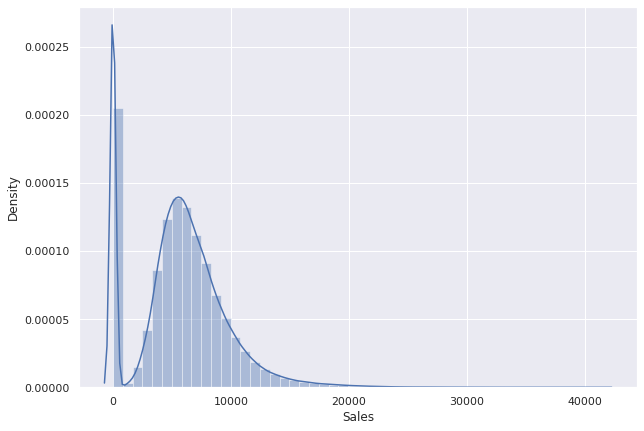

In [93]:
sns.distplot(df['Sales'])

In [94]:
numeric_features=['Date','Sales','Store','Customers','CompetitionDistance','CompetitionOpenSinceMonth','CompetitionOpenSinceYear'
                     ,'Promo2SinceWeek','Promo2SinceYear']

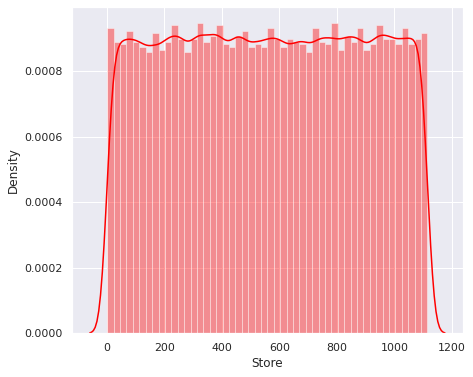

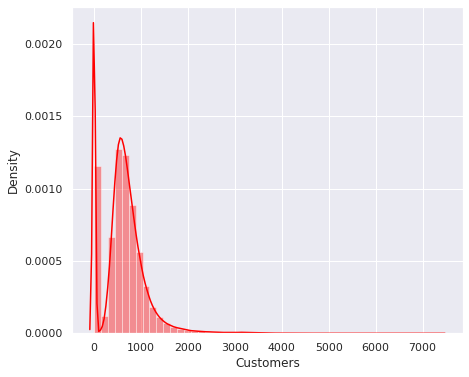

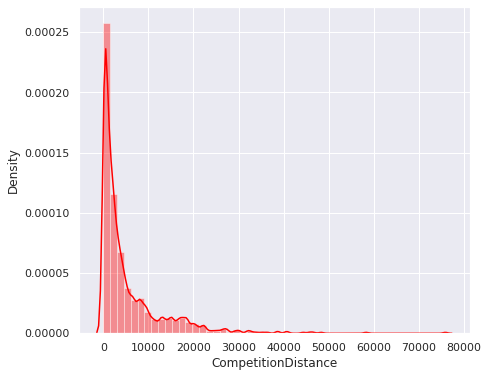

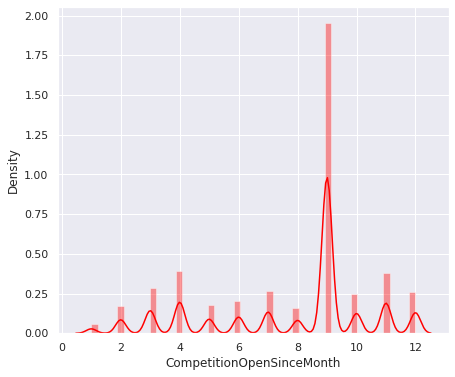

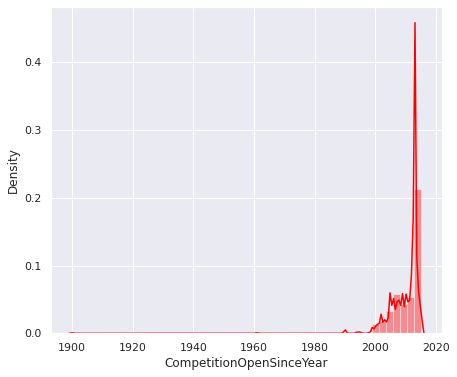

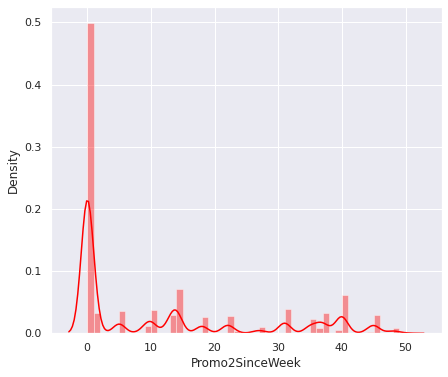

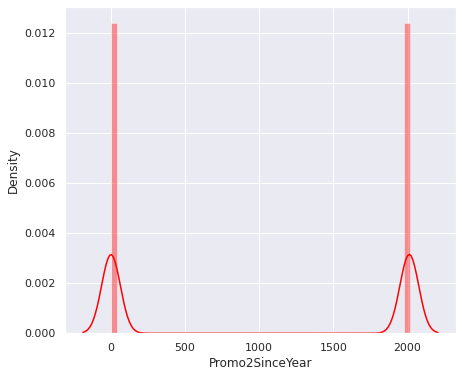

In [95]:
# plotting the numerical features
for feature in numeric_features[2:]:
  plt.figure(figsize=(7,6))
  sns.distplot((df[feature]),color='Red')
  plt.xlabel(feature)

In [96]:
from statsmodels.graphics.gofplots import qqplot
import pylab as py
import statsmodels.api as sm

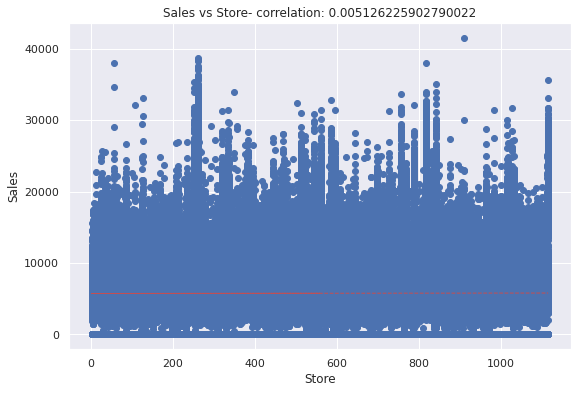

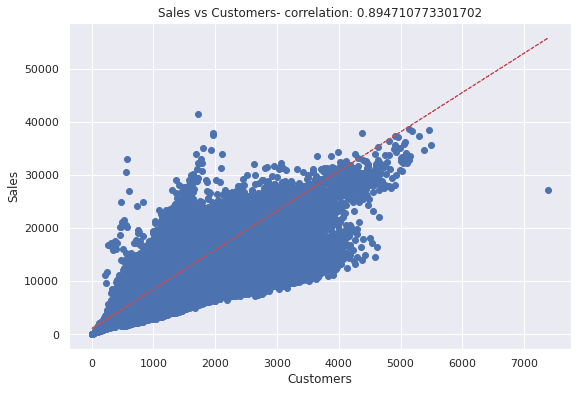

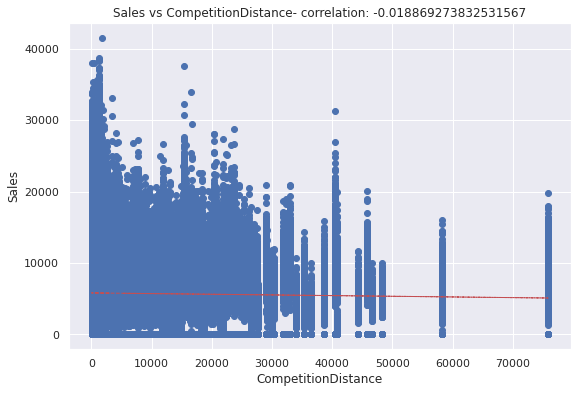

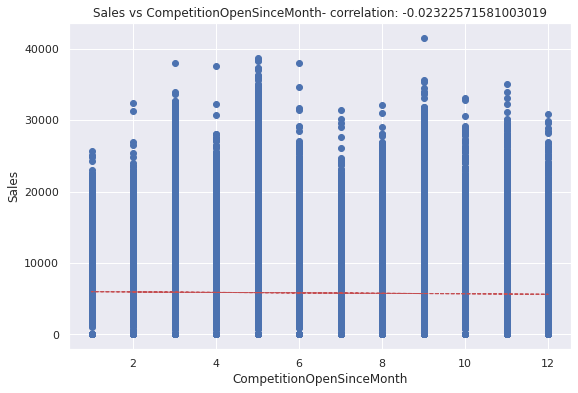

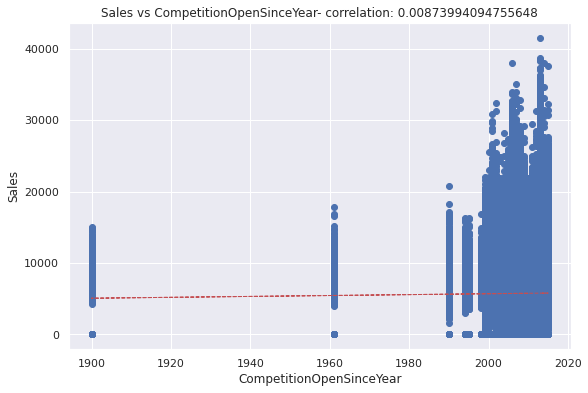

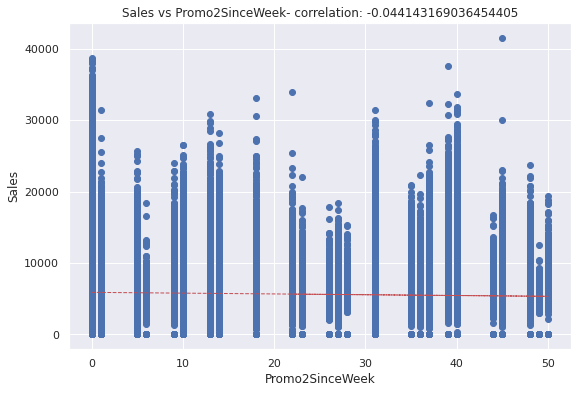

In [97]:
for col in numeric_features[2:-1]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    label = df['Sales']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Sales')
    ax.set_title('Sales vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(df[col], df['Sales'], 1)
    y_hat = np.poly1d(z)(df[col])

    plt.plot(df[col], y_hat, "r--", lw=1)

plt.show()

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 508604 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype 
---  ------                     --------------    ----- 
 0   Store                      1017209 non-null  int64 
 1   DayOfWeek                  1017209 non-null  int64 
 2   Date                       1017209 non-null  object
 3   Sales                      1017209 non-null  int64 
 4   Customers                  1017209 non-null  int64 
 5   Open                       1017209 non-null  int64 
 6   Promo                      1017209 non-null  int64 
 7   StateHoliday               1017209 non-null  int64 
 8   SchoolHoliday              1017209 non-null  int64 
 9   StoreType                  1017209 non-null  object
 10  Assortment                 1017209 non-null  object
 11  CompetitionDistance        1017209 non-null  int64 
 12  CompetitionOpenSinceMonth  1017209 non-null  int64 
 13  CompetitionOpenSinceYe

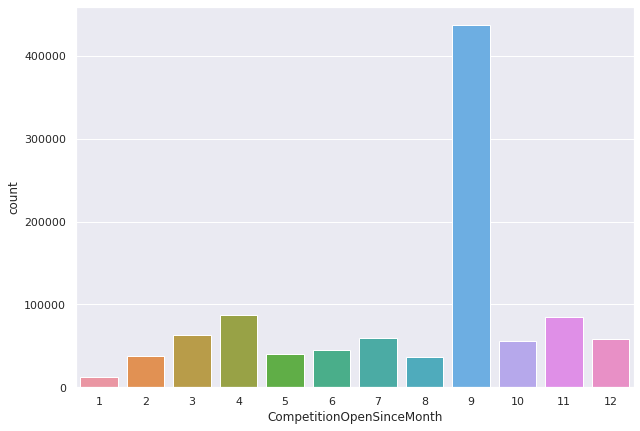

In [99]:
sns.countplot(df['CompetitionOpenSinceMonth'])

In [100]:
#creating a categorical column list 
categorical_variables = ['Store','DayOfWeek','Open','Promo','StateHoliday','SchoolHoliday','StoreType','Assortment','Promo2','PromoInterval']

In [101]:
#sns.countplot(df['Promo2'])
# plt.figure(figsize=(8,5))
# total = float(len(df))
# ax = sns.countplot(x="Promo2", hue="Promo2", data=df)
# plt.title('Data provided for each event', fontsize=20)
# for p in ax.patches:
#     percentage = '{:.1f}%'.format(100 * p.get_height()/total)
#     x = p.get_x() + p.get_width()
#     y = p.get_height()
#     ax.annotate(percentage, (x, y),ha='center')
# plt.show()

Highest Competition Open Since September

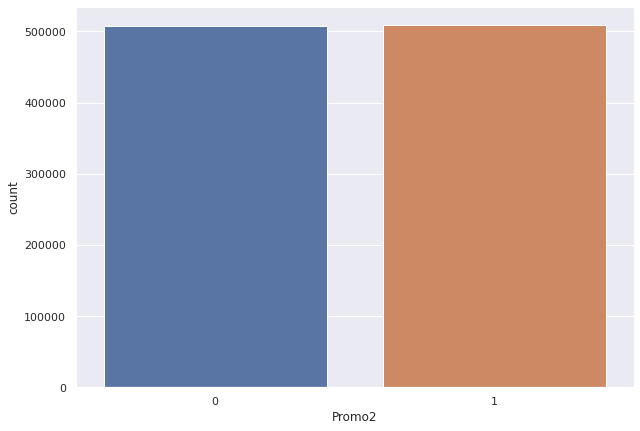

In [102]:
sns.countplot(df['Promo2'])

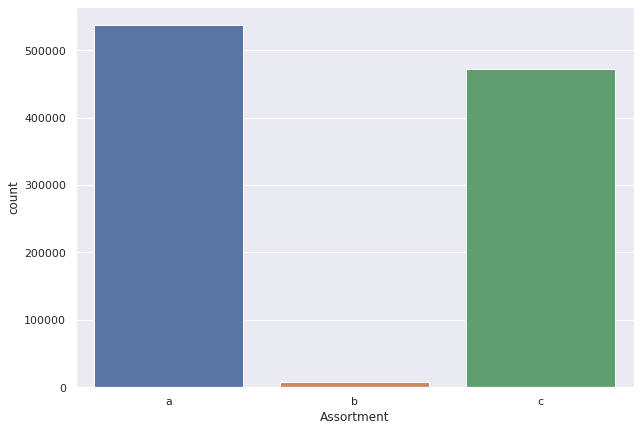

In [103]:
sns.countplot(df['Assortment'])

 a = basic, b = extra, c = extended
 We can Say that Type a i.e Basic have Highest count with respect to extra & extended

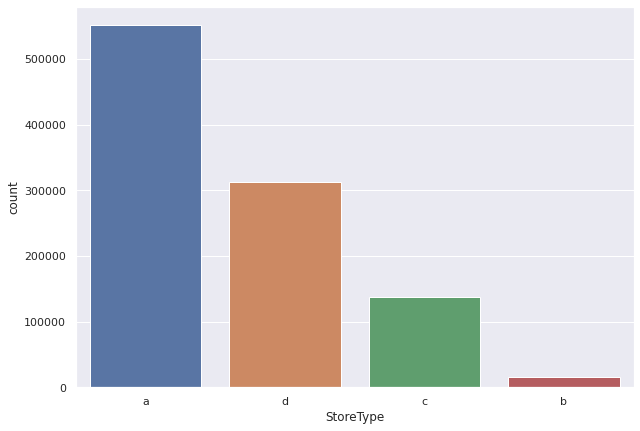

In [104]:
sns.countplot(df['StoreType'])

There are 4 type of Stores a,b,c & d As per the Graph Store 'a' Type have Highest count

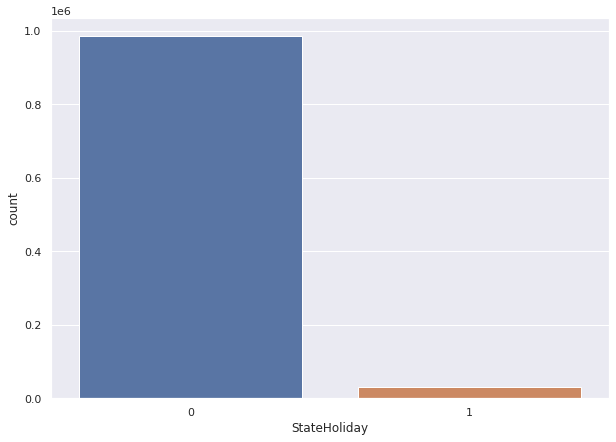

In [105]:
sns.countplot(df['StateHoliday'])

 a = public holiday, b = Easter holiday, c = Christmas, 0 = None.
 As Per Obeservation all Stores are open on StateHolidays except few.

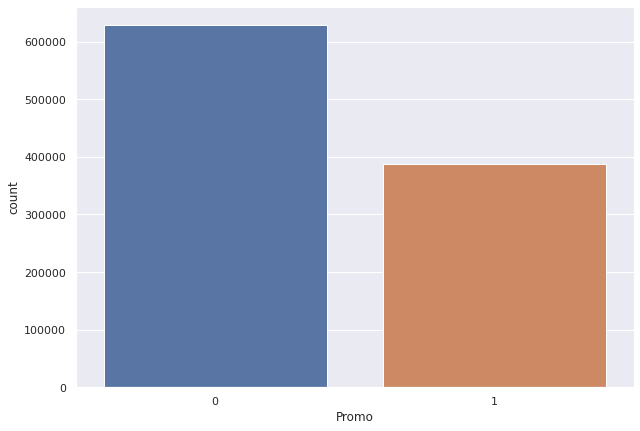

In [107]:
sns.countplot(df['Promo'])


Promo - indicates whethere a store is running a promo on that day 0 is for No 1 is for Yes
As per observation Store is not Running much on a day because 0 have higher value as compare to 1

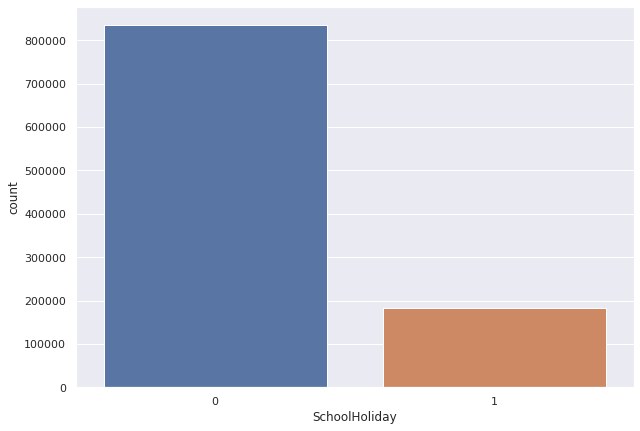

In [108]:
sns.countplot(df['SchoolHoliday'])

From this Observation we can say that most of the Store are Closed on School Holiday

Why did you pick the specific chart?
What is/are the insight(s) found from the chart?
# Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

# **Bivariant**

In [109]:
from datetime import datetime

In [110]:
# Converting Date date column to datetime type
df['Date'] = df['Date'].apply((lambda x: datetime.strptime(x,"%Y-%m-%d")))

In [111]:
df['Month']=df['Date'].apply(lambda x:x.month)
df['Year']=df['Date'].apply(lambda x:x.year)
df['WeekOfYear']=df.Date.dt.isocalendar().week

In [112]:
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Month,Year,WeekOfYear
508604,558,2,2013-10-15,2491,416,1,0,0,0,a,...,3000,2,2010,0,0,0,0,10,2013,42
267131,295,5,2015-04-03,0,0,0,1,1,1,a,...,210,11,2000,1,36,2013,"Mar,Jun,Sept,Dec",4,2015,14
267132,295,4,2015-04-02,6130,663,1,1,0,1,a,...,210,11,2000,1,36,2013,"Mar,Jun,Sept,Dec",4,2015,14
267133,295,3,2015-04-01,8070,888,1,1,0,1,a,...,210,11,2000,1,36,2013,"Mar,Jun,Sept,Dec",4,2015,14
267134,295,2,2015-03-31,6858,786,1,1,0,1,a,...,210,11,2000,1,36,2013,"Mar,Jun,Sept,Dec",3,2015,14


In [113]:
# Convert_Day={0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}

In [114]:
# grouped_multiple = df.groupby(['Team', 'Pos']).agg({'Age': ['mean', 'min', 'max']})
# grouped_multiple.columns = ['age_mean', 'age_min', 'age_max']
# grouped_multiple = grouped_multiple.reset_index()
# print(grouped_multiple)




#  df.groupby(['col5', 'col2']).size()

In [115]:
# g = sns.FacetGrid(df, col="StateHoliday", height=4, aspect=.8)
# g.map(sns.barplot, "StoreType", "Sales");

# **What is the Sales Corresponds to Years?**

In [116]:
df.Year.unique()

array([2013, 2015, 2014])

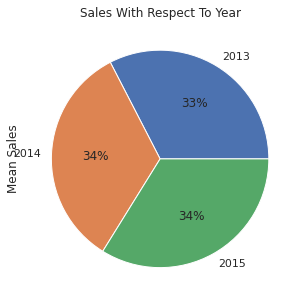

In [117]:
dfg = df.groupby(['Year'])['Sales'].mean()


dfg.plot(kind='pie', title='Sales With Respect To Year', ylabel='Mean Sales',
xlabel='Year', figsize=(6, 5), autopct='%.0f%%')



As Per the Graph Maximum Sales occure in 2015  & 2014

# **Promotion w.r.t Sales**

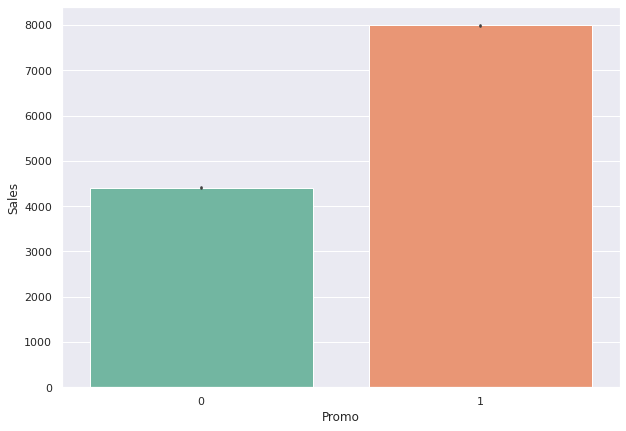

In [121]:
promo_sales = sns.barplot(x="Promo", y="Sales", data=df, palette="Set2")

 Those store who took promotions their sales are high as compared to stores who didnt took promotion.



# **YoY Comparision with Sales**

In [123]:
var=df[['Date','Sales']]


In [124]:
var.head()

,Date,Sales
508604,2013-10-15,2491
267131,2015-04-03,0
267132,2015-04-02,6130
267133,2015-04-01,8070
267134,2015-03-31,6858


In [125]:
var['Difference']=var['Sales'].diff(1)

In [126]:
var.head()

,Date,Sales,Difference
508604,2013-10-15,2491,NaN
267131,2015-04-03,0,-2491.0
267132,2015-04-02,6130,6130.0
267133,2015-04-01,8070,1940.0
267134,2015-03-31,6858,-1212.0


In [127]:
var.dtypes

Date          datetime64[ns]
Sales                  int64
Difference           float64
dtype: object

In [128]:
var['Year']=var['Date'].dt.year

In [129]:
var.head()

,Date,Sales,Difference,Year
508604,2013-10-15,2491,NaN,2013
267131,2015-04-03,0,-2491.0,2015
267132,2015-04-02,6130,6130.0,2015
267133,2015-04-01,8070,1940.0,2015
267134,2015-03-31,6858,-1212.0,2015


In [130]:
var=var.groupby('Year')['Sales'].sum()

In [131]:
var.head()

Year
2013    2302876084
2014    2180804896
2015    1389499643
Name: Sales, dtype: int64

In [132]:
var=var.reset_index()
var.head()

,Year,Sales
0,2013,2302876084
1,2014,2180804896
2,2015,1389499643


In [133]:
import matplotlib.pyplot as plt


In [135]:
var['difference']=var['Sales'].diff(1)

In [136]:
var.head()

,Year,Sales,difference
0,2013,2302876084,NaN
1,2014,2180804896,-122071188.0
2,2015,1389499643,-791305253.0


In [137]:
var['YoY percentage diff']=round(var['difference']/var['Sales']*100,2)
var

,Year,Sales,difference,YoY percentage diff
0,2013,2302876084,NaN,NaN
1,2014,2180804896,-122071188.0,-5.60
2,2015,1389499643,-791305253.0,-56.95


In [138]:
# var=var.groupby('Year')['Sales'].plot(figsize=(10,6),fontsize=12,title='Yearly Sales')

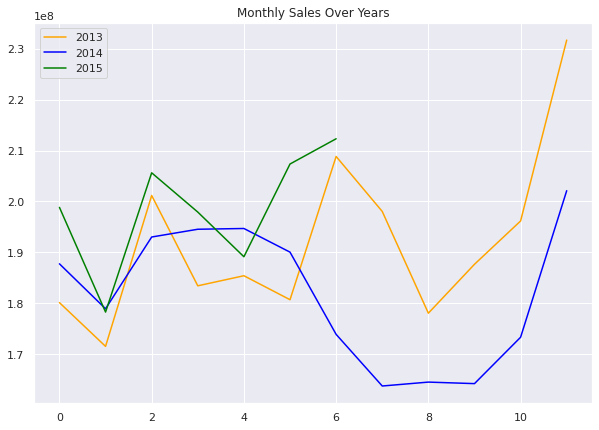

In [139]:
#sales over the years
sales_df_2013 = df[df['Year']== 2013]
sales_df_2014 = df[df['Year']==2014]
sales_df_2015 = df[df['Year']== 2015]

#monthly sales
sales_2013 = sales_df_2013.groupby('Month')['Sales'].sum().reset_index()
sales_2014 = sales_df_2014.groupby('Month')['Sales'].sum().reset_index()
sales_2015 = sales_df_2015.groupby('Month')['Sales'].sum().reset_index()


#plotting
plt.plot(sales_2013.loc[:,'Sales'],label='2013',color='orange')
plt.plot(sales_2014.loc[:,'Sales'],label='2014',color='blue')
plt.plot(sales_2015.loc[:,'Sales'],label='2015',color='green')
plt.title('Monthly Sales Over Years')
plt.legend()

# **MoM** **Comparision with Sales**

# **Monthly Sales Average**

In [140]:
monthly=df[['Date','Sales']]
#monthly.head()
monthly['Diffrence']=monthly['Sales'].diff(1)
#monthly.head()
#monthly.dtypes
monthly['Month']=monthly['Date'].dt.month
#monthly.head()
monthly=monthly.groupby('Month')['Sales'].mean()
monthly=monthly.reset_index()
monthly['difference']=monthly['Sales'].diff(1)
monthly['MoM percentage diff']=round(monthly['difference']/monthly['Sales']*100,2)
monthly

,Month,Sales,difference,MoM percentage diff
0,1,5465.395529,NaN,NaN
1,2,5645.253150,179.857621,3.19
2,3,5784.578871,139.325721,2.41
3,4,5738.866916,-45.711955,-0.80
4,5,5489.639973,-249.226943,-4.54
5,6,5760.964375,271.324402,4.71
6,7,6064.915711,303.951336,5.01
7,8,5693.016554,-371.899157,-6.53
8,9,5570.246033,-122.770521,-2.20
9,10,5537.037419,-33.208613,-0.60


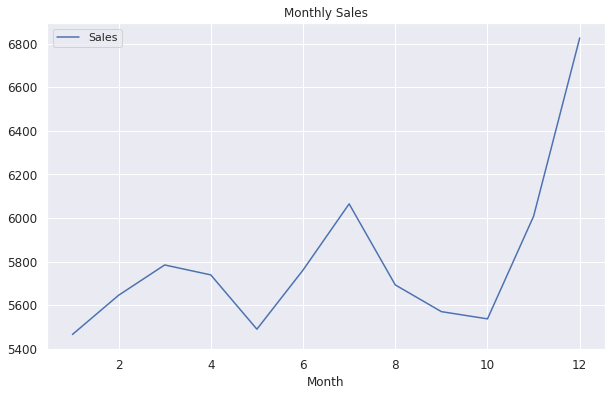

In [141]:
df[['Month','Sales']].groupby('Month').mean().plot(figsize=(10,6),fontsize=12,title='Monthly Sales')  #hist

[]

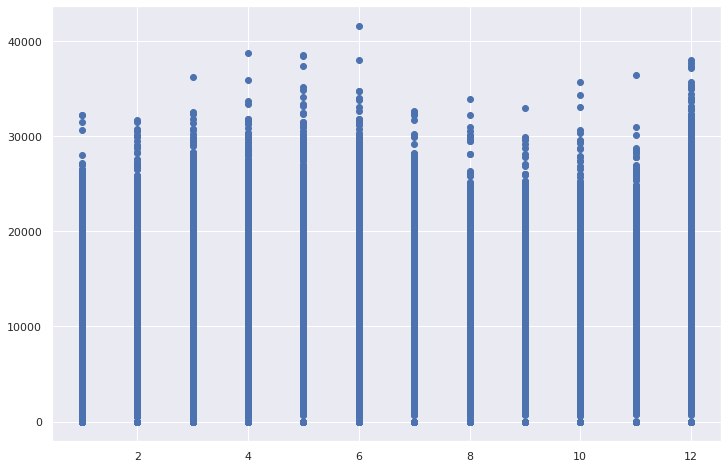

In [142]:
#Sales_Month
plt.figure(figsize=(12, 8))
plt.scatter(df["Month"],df["Sales"])
plt.plot()

# **Each Store Type Customers and Sales**




In [143]:
Dual=df.groupby(by='StoreType')[['Sales','Customers']].mean()  #sum
Dual=pd.DataFrame(Dual)
Dual

,Sales,Customers
StoreType,,
a,5738.179710,659.034880
b,10058.837334,1987.720846
c,5723.629246,673.265894
d,5641.819243,501.434892


# **Week & Year wise Customers**

In [144]:

def plotter(Parameter , Parameter2):
  fig, axes = plt.subplots(2,1)
  fig.set_size_inches(15, 10)
  sns.barplot(x=Parameter, y=Parameter2, data=df ,hue="DayOfWeek", ax = axes[0])
  sns.boxplot(x=Parameter, y=Parameter2, data=df ,hue="DayOfWeek", ax=axes[1])

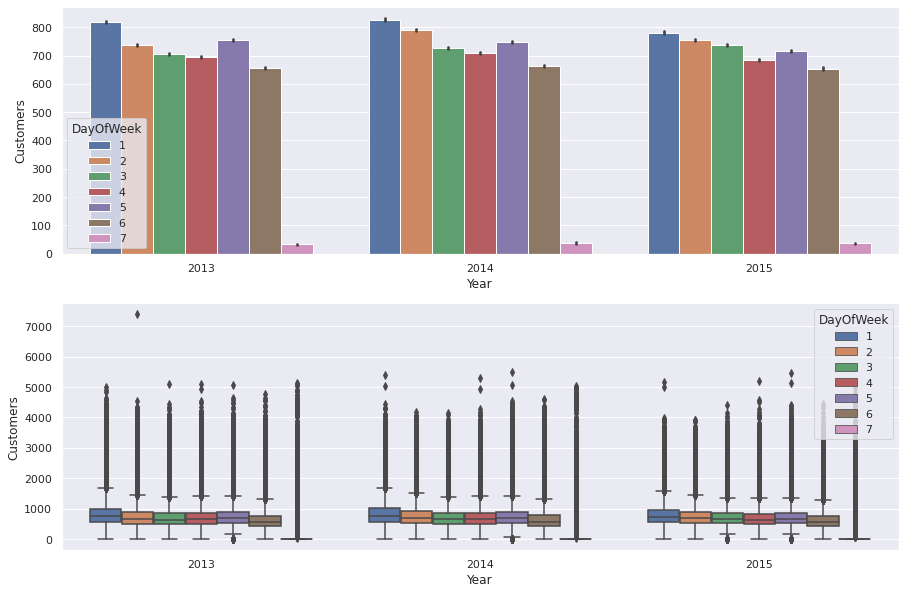

In [145]:
plotter('Year',"Customers")

# **Correlation Matrixs**

In [147]:
#we need only meaningful numeric columns here, let's drop the unnecessary to get a clear picture
columns_to_drop = ['Store', 'Year']
corr_df = df.drop(columns = columns_to_drop, axis =1)

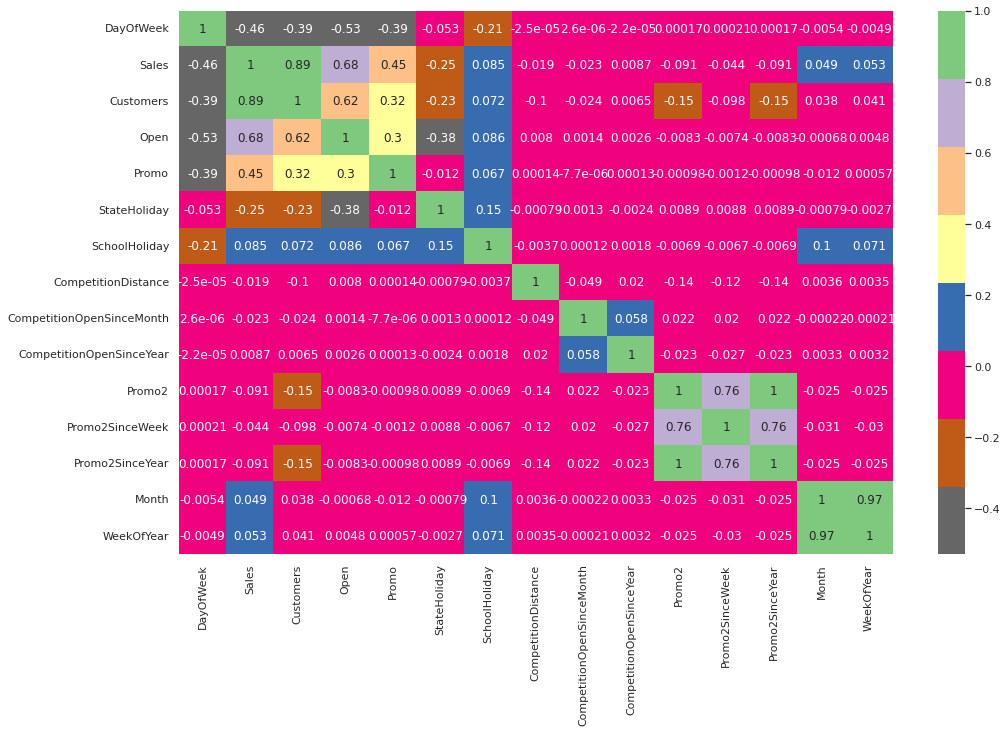

In [148]:
# plt.figure(figsize=(18,8))
# correlation = df.corr()
# sns.heatmap(abs(correlation), annot=True, cmap='Accent_r')

#correlation heatmap
plt.figure(figsize=(16,10))
sns.heatmap(corr_df.corr(), cmap='Accent_r', annot=True)

In [149]:
def comp_months(df):
    df['CompetitionOpen'] = 12 * (df.Year - df.CompetitionOpenSinceYear) + (df.Month - df.CompetitionOpenSinceMonth)
    df['CompetitionOpen'] = df['CompetitionOpen'].map(lambda x: 0 if x < 0 else x).fillna(0)


In [151]:
 comp_months(df)

In [152]:
df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Month,Year,WeekOfYear,CompetitionOpen
508604,558,2,2013-10-15,2491,416,1,0,0,0,a,...,2,2010,0,0,0,0,10,2013,42,44
267131,295,5,2015-04-03,0,0,0,1,1,1,a,...,11,2000,1,36,2013,"Mar,Jun,Sept,Dec",4,2015,14,173
267132,295,4,2015-04-02,6130,663,1,1,0,1,a,...,11,2000,1,36,2013,"Mar,Jun,Sept,Dec",4,2015,14,173
267133,295,3,2015-04-01,8070,888,1,1,0,1,a,...,11,2000,1,36,2013,"Mar,Jun,Sept,Dec",4,2015,14,173
267134,295,2,2015-03-31,6858,786,1,1,0,1,a,...,11,2000,1,36,2013,"Mar,Jun,Sept,Dec",3,2015,14,172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568305,624,3,2015-07-08,6238,579,1,0,0,1,a,...,9,2011,0,0,0,0,7,2015,28,46
568296,624,5,2015-07-17,6619,626,1,1,0,1,a,...,9,2011,0,0,0,0,7,2015,29,46
568298,624,3,2015-07-15,6908,668,1,1,0,1,a,...,9,2011,0,0,0,0,7,2015,29,46
568671,624,1,2014-07-07,7194,713,1,0,0,1,a,...,9,2011,0,0,0,0,7,2014,28,34


In [153]:
def check_promo_month(row):
    month2str = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun',              
                 7:'Jul', 8:'Aug', 9:'Sept', 10:'Oct', 11:'Nov', 12:'Dec'}
    try:
        months = (row['PromoInterval'] or '').split(',')
        if row['Promo2Open'] and month2str[row['Month']] in months:
            return 1
        else:
            return 0
    except Exception:
        return 0

def promo_cols(df):
    # Months since Promo2 was open
    df['Promo2Open'] = 12 * (df.Year - df.Promo2SinceYear) +  (df.WeekOfYear - df.Promo2SinceWeek)*7/30.5
    df['Promo2Open'] = df['Promo2Open'].map(lambda x: 0 if x < 0 else x).fillna(0) #* df['Promo2']
    # Whether a new round of promotions was started in the current month
    df['IsPromo2Month'] = df.apply(check_promo_month, axis=1) * df['Promo2']

In [154]:
promo_cols(df)

In [155]:

#Dropping unecessary columns
df.drop(['Promo2SinceYear','Promo2','Promo2SinceWeek','PromoInterval'],axis=1,inplace=True)

In [156]:
# creating copy of the dataset
df_copy=df.copy()


In [157]:

# Remove column 
df_copy.drop(['Date','CompetitionOpenSinceMonth','CompetitionOpenSinceYear'], axis=1,inplace=True)

In [158]:
df_copy = df_copy[df_copy.Open == 1].copy()

In [159]:
df_copy.columns

Index(['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'Month', 'Year', 'WeekOfYear', 'CompetitionOpen',
       'Promo2Open', 'IsPromo2Month'],
      dtype='object')

In [160]:
input_cols = ['Store', 'DayOfWeek', 'Promo', 'StateHoliday', 'SchoolHoliday', 
              'StoreType', 'Assortment', 'CompetitionDistance',
               'Month', 'Year',  'Promo2','PromoInterval'
              ]
target_col = 'Sales'

In [161]:
numeric_cols = [ 'Store',
              'CompetitionDistance', 'CompetitionOpen', 'Promo2Open', 
               'Month', 'Year','WeekOfYear']

In [162]:
categorical_cols=['Promo','SchoolHoliday','StateHoliday','IsPromo2Month']

In [163]:
df_copy.columns

Index(['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'Month', 'Year', 'WeekOfYear', 'CompetitionOpen',
       'Promo2Open', 'IsPromo2Month'],
      dtype='object')

In [164]:
#creating a categorical column list 
categorical_cols_to_encode=['DayOfWeek','StoreType','Assortment']

In [165]:

from sklearn.preprocessing import OneHotEncoder

In [166]:
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore').fit(df_copy[categorical_cols_to_encode])
encoded_cols = list(encoder.get_feature_names(categorical_cols_to_encode))
df_copy[encoded_cols] = encoder.transform(df_copy[categorical_cols_to_encode])

In [167]:
encoded_cols

['DayOfWeek_1',
 'DayOfWeek_2',
 'DayOfWeek_3',
 'DayOfWeek_4',
 'DayOfWeek_5',
 'DayOfWeek_6',
 'DayOfWeek_7',
 'StoreType_a',
 'StoreType_b',
 'StoreType_c',
 'StoreType_d',
 'Assortment_a',
 'Assortment_b',
 'Assortment_c']

In [168]:
df_copy.drop(['DayOfWeek','StoreType','Assortment'],axis=1,inplace=True)
# df.drop(['Promo2SinceYear','Promo2SinceWeek','PromoInterval'],axis=1,inplace=True)

In [169]:
X = df_copy[numeric_cols + encoded_cols + categorical_cols]

In [170]:
X.shape

(844392, 25)

In [171]:
y=df_copy['Sales']

In [172]:
y

508604    2491
267132    6130
267133    8070
267134    6858
267135    7660
          ... 
568295    4216
568305    6238
568296    6619
568298    6908
568671    7194
Name: Sales, Length: 844392, dtype: int64

# **Transformation**

In [173]:
df['Sales'] = np.log10(df['Sales'])

In [174]:
df.drop(df[df['Sales'] == float("-inf")].index,inplace=True)

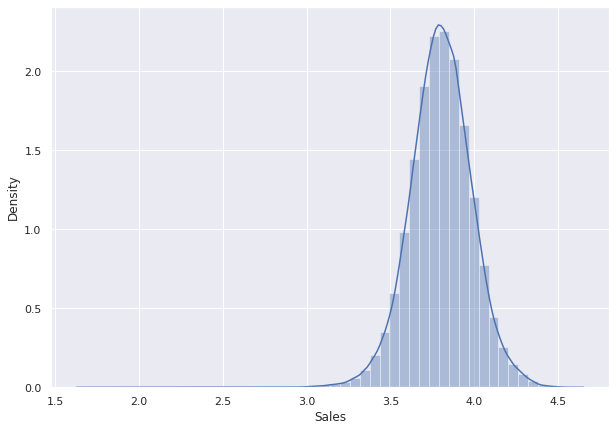

In [175]:
sns.distplot(df['Sales'])

In [176]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
import scipy.stats as stats
import numpy as np
import pylab as py
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [177]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

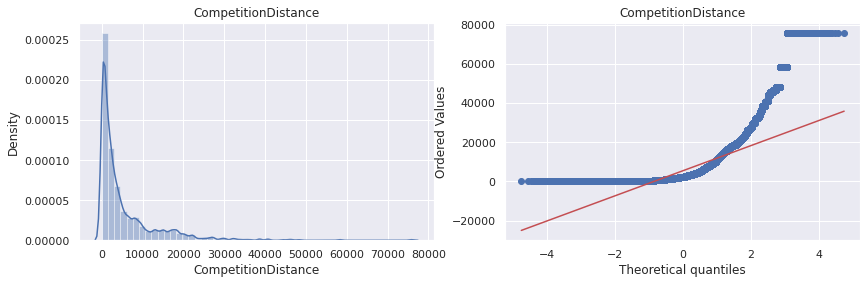

In [178]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['CompetitionDistance'])
plt.title('CompetitionDistance')
plt.subplot(122)
stats.probplot(X_train['CompetitionDistance'],dist='norm',plot=plt)
plt.title('CompetitionDistance')
plt.show()

In [179]:
numeric_cols = [ 'Store',
              'CompetitionDistance', 'CompetitionOpen', 'Promo2Open', 'IsPromo2Month',
               'Month', 'Year','WeekOfYear']

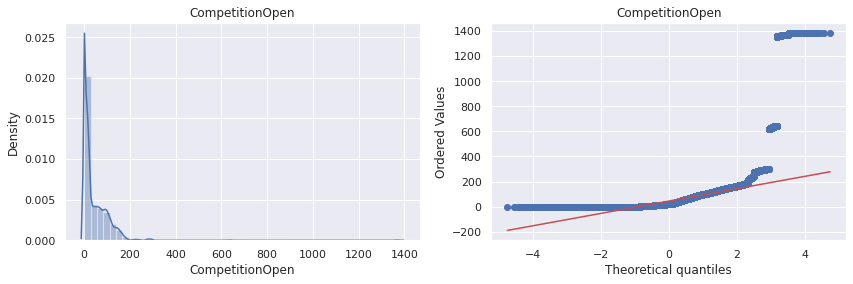

In [180]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['CompetitionOpen'])
plt.title('CompetitionOpen')
plt.subplot(122)
stats.probplot(X_train['CompetitionOpen'],dist='norm',plot=plt)
plt.title('CompetitionOpen')
plt.show()

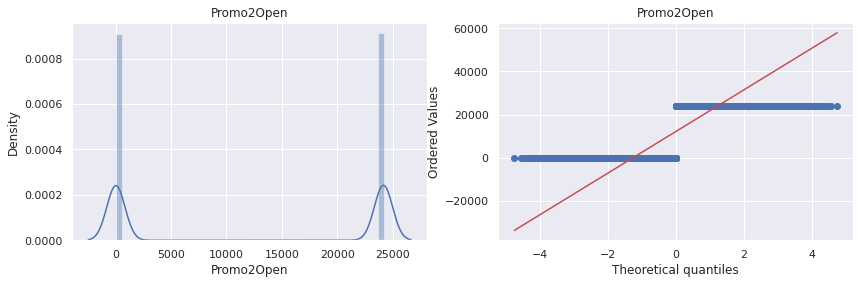

In [181]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['Promo2Open'])
plt.title('Promo2Open')
plt.subplot(122)
stats.probplot(X_train['Promo2Open'],dist='norm',plot=plt)
plt.title('Promo2Open')
plt.show()

# **Outliers**

In [182]:
df_copy['Sales'].skew()

1.5939220392699807

In [183]:
print("Mean value of Sales",df_copy['Sales'].mean())
print("Std value of Sales",df_copy['Sales'].std())
print("Min value of Sales",df_copy['Sales'].min())
print("Max value of Sales",df_copy['Sales'].max())

Mean value of Sales 6955.514290755952
Std value of Sales 3104.214680428348
Min value of Sales 0
Max value of Sales 41551


In [184]:
# Finding the boundary values
print("Highest allowed",df_copy['Sales'].mean() + 3*df_copy['Sales'].std())
print("Lowest allowed",df_copy['Sales'].mean() - 3*df_copy['Sales'].std())

Highest allowed 16268.158332040995
Lowest allowed -2357.1297505290922


In [185]:
# Finding the outliers
df_copy[(df_copy['Sales'] > 16268.15) | (df_copy['Sales'] <-2357.12)]

,Store,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,CompetitionDistance,Month,Year,...,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c
274744,303,24580,1370,1,1,0,1,15430,7,2014,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
274745,303,27318,1308,1,1,0,1,15430,7,2014,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
274746,303,16838,1043,1,1,0,1,15430,7,2014,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
186554,207,18425,1755,1,1,0,0,6870,6,2015,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
186645,207,17673,1735,1,1,0,0,6870,3,2015,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349191,383,22450,2544,1,1,0,1,350,1,2014,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
349193,383,16666,2155,1,0,0,1,350,1,2014,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
349195,383,16780,2188,1,0,0,1,350,1,2014,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
349205,383,27193,3127,1,0,0,1,350,12,2013,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


# **Capping**

In [186]:
upper_limit = df_copy['Sales'].mean() + 3*df_copy['Sales'].std()
lower_limit = df_copy['Sales'].mean() - 3*df_copy['Sales'].std()

In [187]:

lower_limit

-2357.1297505290922

In [188]:
upper_limit

16268.158332040995

In [189]:

df_copy['Sales'] = np.where(
    df_copy['Sales']>upper_limit,
    upper_limit,
    np.where(
        df_copy['Sales']<lower_limit,
        lower_limit,
        df_copy['Sales']
    )
)

In [190]:

df_copy['Sales'].describe()

count    844392.000000
mean       6906.038949
std        2900.888250
min           0.000000
25%        4859.000000
50%        6369.000000
75%        8360.000000
max       16268.158332
Name: Sales, dtype: float64

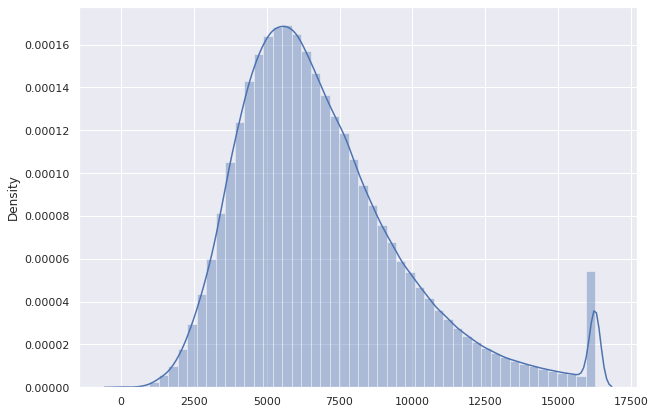

In [191]:
sns.distplot(x=df_copy["Sales"])

# **Trimming**

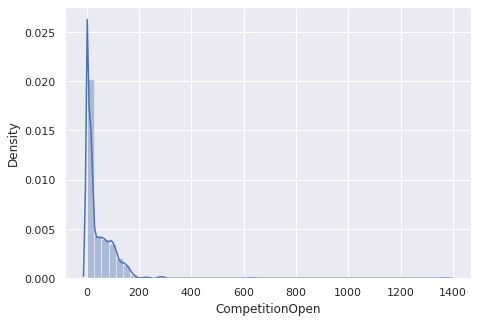

In [192]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df_copy['CompetitionOpen'])

In [193]:
df_copy['CompetitionOpen'].skew()

7.976304510548171

In [194]:
df_copy['CompetitionOpen'] = np.log(df_copy['CompetitionOpen'])
df_copy['CompetitionOpen']=np.exp(df_copy['CompetitionOpen'])

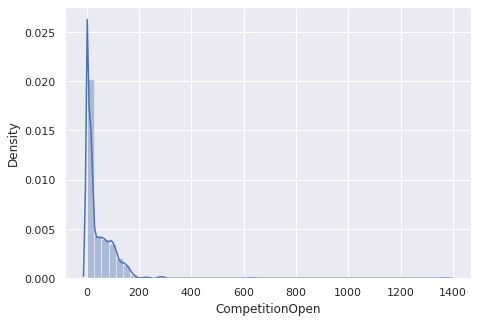

In [195]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df_copy['CompetitionOpen'])

In [196]:
df_copy['CompetitionOpen'].describe()

count    844392.000000
mean         44.505409
std          63.778199
min           0.000000
25%           5.000000
50%          20.000000
75%          73.000000
max        1386.000000
Name: CompetitionOpen, dtype: float64

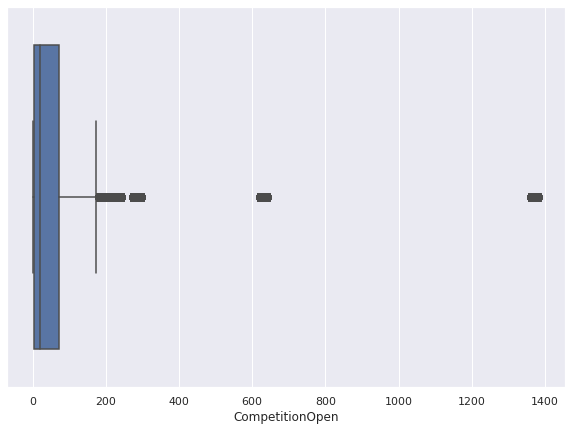

In [197]:
sns.boxplot(df_copy['CompetitionOpen'])

In [198]:
# Finding the IQR
percentile25 = df_copy['CompetitionOpen'].quantile(0.25)
percentile75 = df_copy['CompetitionOpen'].quantile(0.75)

In [199]:
percentile75

72.99999999999999

In [200]:
iqr = percentile75 - percentile25

In [201]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [202]:
print("Upper limit",upper_limit)
print("Lower limit",lower_limit)


Upper limit 174.99999999999994
Lower limit -96.99999999999997


In [203]:

df_copy[df_copy['CompetitionOpen'] > upper_limit]

,Store,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,CompetitionDistance,Month,Year,...,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c
267021,295,5297.0,775,1,0,0,0,210,7,2015,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
267022,295,5195.0,764,1,0,0,0,210,7,2015,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
267023,295,4838.0,732,1,0,0,0,210,7,2015,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
267025,295,6049.0,786,1,0,0,0,210,7,2015,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
267035,295,5179.0,806,1,0,0,0,210,7,2015,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201942,223,10153.0,923,1,1,0,1,2920,7,2013,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
201930,223,10338.0,979,1,1,0,1,2920,8,2013,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
201956,223,7784.0,768,1,1,0,1,2920,7,2013,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
202067,223,12223.0,1081,1,1,0,1,2920,3,2013,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [204]:

df_copy[df_copy['CompetitionOpen'] > lower_limit]

,Store,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,CompetitionDistance,Month,Year,...,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c
508604,558,2491.0,416,1,0,0,0,3000,10,2013,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
267132,295,6130.0,663,1,1,0,1,210,4,2015,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
267133,295,8070.0,888,1,1,0,1,210,4,2015,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
267134,295,6858.0,786,1,1,0,1,210,3,2015,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
267135,295,7660.0,769,1,1,0,1,210,3,2015,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568295,624,4216.0,418,1,0,0,0,6920,7,2015,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
568305,624,6238.0,579,1,0,0,1,6920,7,2015,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
568296,624,6619.0,626,1,1,0,1,6920,7,2015,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
568298,624,6908.0,668,1,1,0,1,6920,7,2015,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [205]:


df_copy['CompetitionOpen'] = np.where(
    df_copy['CompetitionOpen'] > upper_limit,
    upper_limit,
    np.where(
        df_copy['CompetitionOpen'] < lower_limit,
        lower_limit,
        df_copy['CompetitionOpen']
    )
)

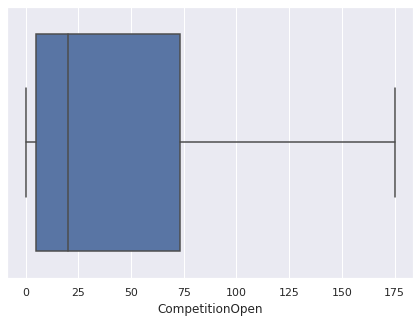

In [206]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.boxplot(df_copy['CompetitionOpen'])

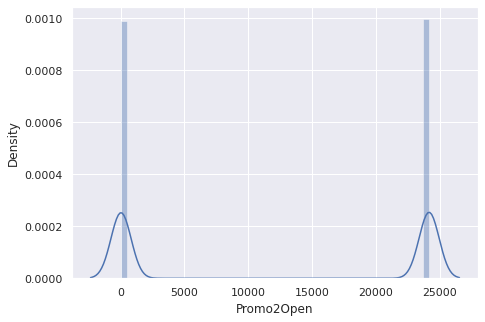

In [207]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df_copy['Promo2Open'])

In [219]:
df_copy['CompetitionDistance'].describe()

count    844392.000000
mean       5449.868829
std        7800.946702
min          20.000000
25%         710.000000
50%        2325.000000
75%        6880.000000
max       75860.000000
Name: CompetitionDistance, dtype: float64

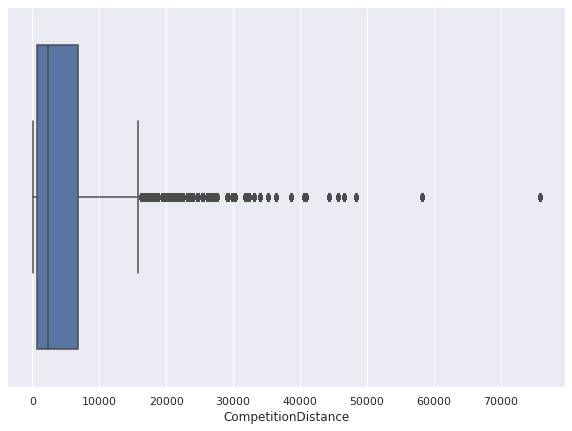

In [220]:
sns.boxplot(df_copy['CompetitionDistance'])

In [221]:
# Finding the IQR
percentile25 = df_copy['CompetitionDistance'].quantile(0.25)
percentile75 = df_copy['CompetitionDistance'].quantile(0.75)

In [222]:

iqr = percentile75 - percentile25

In [223]:

upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr


print("Upper limit",upper_limit)
print("Lower limit",lower_limit)

Upper limit 16135.0
Lower limit -8545.0


In [224]:
df_copy[df_copy['CompetitionDistance'] > upper_limit]

,Store,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,CompetitionDistance,Month,Year,...,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c
868292,953,2628.0,265,1,0,0,0,19830,12,2013,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
868293,953,6134.0,657,1,0,0,1,19830,12,2013,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
868314,953,6307.0,604,1,1,0,0,19830,12,2013,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
868313,953,2527.0,269,1,0,0,0,19830,12,2013,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
868311,953,5044.0,565,1,0,0,0,19830,12,2013,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348342,382,5547.0,511,1,0,0,0,26130,10,2013,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
348343,382,9152.0,789,1,0,0,0,26130,10,2013,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
348345,382,7039.0,661,1,0,0,0,26130,10,2013,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
348370,382,5259.0,485,1,0,0,0,26130,9,2013,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [225]:
df_copy[df_copy['CompetitionDistance'] > lower_limit]

,Store,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,CompetitionDistance,Month,Year,...,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c
508604,558,2491.0,416,1,0,0,0,3000,10,2013,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
267132,295,6130.0,663,1,1,0,1,210,4,2015,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
267133,295,8070.0,888,1,1,0,1,210,4,2015,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
267134,295,6858.0,786,1,1,0,1,210,3,2015,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
267135,295,7660.0,769,1,1,0,1,210,3,2015,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568295,624,4216.0,418,1,0,0,0,6920,7,2015,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
568305,624,6238.0,579,1,0,0,1,6920,7,2015,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
568296,624,6619.0,626,1,1,0,1,6920,7,2015,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
568298,624,6908.0,668,1,1,0,1,6920,7,2015,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [226]:
df_copy['CompetitionDistance'] = np.where(
    df_copy['CompetitionDistance'] > upper_limit,
    upper_limit,
    np.where(
        df_copy['CompetitionDistance'] < lower_limit,
        lower_limit,
        df_copy['CompetitionDistance']
    )
)

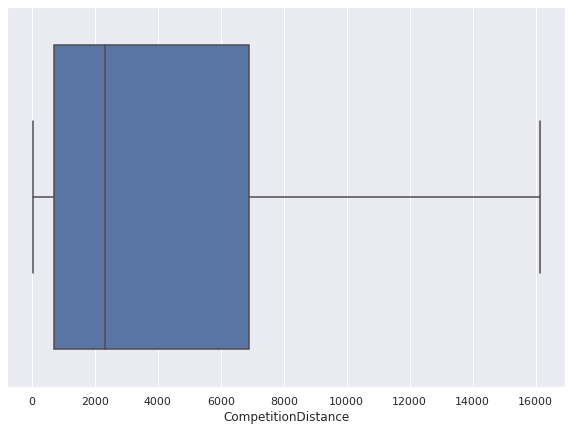

In [227]:
sns.boxplot(df_copy['CompetitionDistance'])

In [228]:
sales_mean=df_copy.Sales.mean()

In [229]:

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score

from sklearn.preprocessing import PowerTransformer


from sklearn import metrics

from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [230]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2,random_state=0)
# trf=FunctionTransformer(func=np.log1p)
# X_train_transformed=trf.fit_transform(X_train)
# X_test_transformed=trf.transform(X_test)


In [231]:
reg = LinearRegression().fit(X_train, Y_train)

In [232]:
#predicting the values for train set
Y_Train_pred = reg.predict(X_train)

#predicting the values for test set
Y_Test_pred = reg.predict(X_test)

In [233]:
# Evaluation metrics
Linear_MAE = mean_absolute_error(Y_test, Y_Test_pred)
print("MAE :" ,Linear_MAE)

Linear_MSE  = mean_squared_error((Y_test), (Y_Test_pred))
print("MSE :" , Linear_MSE)

Linear_RMSE = np.sqrt(Linear_MSE)
print("RMSE :" ,Linear_RMSE)

RMPSE=Linear_RMSE/sales_mean
print("RMPSE :",RMPSE)

Linear_r2 = r2_score((Y_test), (Y_Test_pred))
print("R2 :" ,Linear_r2)

ADJUSTED_R2=1-((1-Linear_r2)*(168879-1)/(168879-1-26))
print("Adjusted R2 :" ,ADJUSTED_R2)


MAE : 1991.5935869598843
MSE : 7414251.544302847
RMSE : 2722.912327693062
RMPSE : 0.39427989729987034
R2 : 0.22503186151122445
Adjusted R2 : 0.22491253114142895


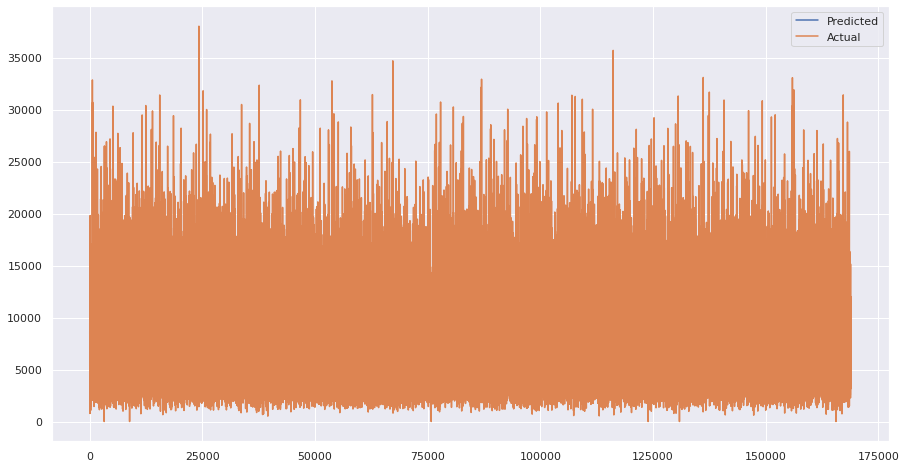

In [234]:
plt.figure(figsize=(15,8))

plt.plot(Y_Test_pred)
plt.plot(np.array(Y_test))

plt.legend(['Predicted','Actual'])
plt.show()

In [235]:
X_test.shape

(168879, 25)

In [236]:
from sklearn.ensemble import RandomForestRegressor

In [237]:
#applying RandomForestRegressor on default parameters
# from sklearn.ensemble import RandomForestRegressor
# rf = RandomForestRegressor(criterion='mae')
# rf.fit(X_train, Y_train)
# Y_Train_pred_rf = rf.predict(X_train)
# Y_Test_pred_rf = rf.predict(X_test)

In [238]:
# evaluation metrics
# print('Train MAE:', mean_absolute_error(Y_train, Y_Train_pred_rf))
# print('Test MAE:', mean_absolute_error(Y_test, Y_Test_pred_rf))
# RMSE=np.sqrt(mean_squared_error(Y_test, Y_Test_pred_rf))
# print('Root Mean Squared Error (RMSE):', np.sqrt(mean_squared_error(Y_test, Y_Test_pred_rf)))
# RMPSE=RMSE/sales_mean
# print("RMPSE :",RMPSE)
# print("Train R2 :" ,r2_score((Y_train),(Y_Train_pred_rf)))
# print("R2 :" ,r2_score((Y_test),(Y_Test_pred_rf)))
# ADJUSTED_R2=1-((1-r2_score((Y_test),(Y_Test_pred_rf)))*(168879-1)/(168879-1-26))
# print("Adjusted R2 :" ,ADJUSTED_R2)

In [239]:
print(X_train.shape)
print(X_test.shape)

(675513, 25)
(168879, 25)


In [240]:
rf = RandomForestRegressor()

In [241]:
rf.fit(X_train,Y_train)
Y_Train_pred_rf = rf.predict(X_train)
Y_Test_pred_rf=rf.predict(X_test)


In [242]:
#evaluation metrics
print('Train MAE:', mean_absolute_error(Y_train, Y_Train_pred_rf))
print('Test MAE:', mean_absolute_error(Y_test, Y_Test_pred_rf))
RMSE=np.sqrt(mean_squared_error(Y_test, Y_Test_pred_rf))
print('Root Mean Squared Error (RMSE):', np.sqrt(mean_squared_error(Y_test, Y_Test_pred_rf)))
RMPSE=RMSE/sales_mean
print("RMPSE :",RMPSE)
print("Train R2 :" ,r2_score((Y_train),(Y_Train_pred_rf)))
print("R2 :" ,r2_score((Y_test),(Y_Test_pred_rf)))
ADJUSTED_R2=1-((1-r2_score((Y_test),(Y_Test_pred_rf)))*(168879-1)/(168879-1-26))
print("Adjusted R2 :" ,ADJUSTED_R2)

Train MAE: 244.31321576342728
Test MAE: 660.9222820480935
Root Mean Squared Error (RMSE): 1021.3668479097557
RMPSE : 0.1478947418922352
Train R2 : 0.9849780518078198
R2 : 0.890961455514577
Adjusted R2 : 0.8909446656503371


In [243]:
# Number of trees in random forest
n_estimators = [20,60,100,120]

# Maximum number of levels in tree
max_depth = [3,5,7]


In [244]:
param_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth
             }
print(param_grid)

{'n_estimators': [20, 60, 100, 120], 'max_depth': [3, 5, 7]}


In [245]:
from sklearn.model_selection import GridSearchCV

rf_grid = GridSearchCV(estimator = rf, 
                       param_grid = param_grid, 
                       cv = 5, 
                       verbose=2, 
                       n_jobs = -1)

In [ ]:
rf_grid.fit(X_train,Y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


In [ ]:
rf_grid.best_params_

In [ ]:
rf_grid.best_score_

RandomSearchCV

In [ ]:
# Number of trees in random forest
n_estimators = [20,60,100,120]

# Maximum number of levels in tree
max_depth = [3,5,7]

# Bootstrap samples
bootstrap = [True,False]

# Minimum number of samples required to split a node
min_samples_split = [2, 5]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]

In [ ]:
param_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
              'bootstrap':bootstrap,
              'min_samples_split':min_samples_split,
              'min_samples_leaf':min_samples_leaf
             }
print(param_grid)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

rf_grid = RandomizedSearchCV(estimator = rf, 
                       param_distributions = param_grid, 
                       cv = 5, 
                       verbose=2, 
                       n_jobs = -1)

In [ ]:
rf_grid.fit(X_train,Y_train)

In [ ]:
rf_grid.best_params_

In [ ]:
rf_grid.best_score_

In [ ]:
# finding the optimal model w.r.t. best_estimator_
rf2_optimal_model = rf_grid.best_estimator_

In [ ]:
rf2_optimal_model

In [ ]:
Y_train_preds_rf2 =  rf2_optimal_model.predict(X_train)
Y_test_preds_rf2  = rf2_optimal_model.predict(X_test)

In [ ]:
# Evaluaton metrics for optimal model 
optimal_rf_model = pd.DataFrame()
optimal_rf_model['Model Name'] = ['Random Forest Regressor']
optimal_rf_model['Train MAE'] = [mean_absolute_error(Y_train, Y_train_preds_rf2)]
optimal_rf_model['Test MAE'] = [mean_absolute_error(Y_test, Y_test_preds_rf2)]
optimal_rf_model['Test RMSE'] = [np.sqrt(mean_squared_error(Y_test, Y_test_preds_rf2))]
optimal_rf_model['Train R2'] = [r2_score((Y_train),(Y_train_preds_rf2))]
optimal_rf_model['Test R2']  = [r2_score((Y_test),(Y_test_preds_rf2))]
optimal_rf_model['Test Adjusted R2'] = [1-(1-r2_score((Y_test),(Y_test_preds_rf2)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))]
optimal_rf_model


In [ ]:
# getting features according to their importance in prediction
features = X_train.columns
importances = rf_grid.best_estimator_.feature_importances_
indices = np.argsort(importances)

In [ ]:
plt.figure(figsize=(10,6))
plt.bar(x=features, height=importances, color='#087E8B')
plt.title('Feature Importances for RF Model', size=20)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
from xgboost import XGBRegressor

In [ ]:
xgb = XGBRegressor(learning_rate=0.1)
grid_values = {'n_estimators':[50, 80, 100], 'max_depth':[3, 5, 7]}

In [ ]:
xgb_random = RandomizedSearchCV(xgb, param_distributions = grid_values, cv=3)


In [ ]:

# Fit the object to train dataset
xgb_random.fit(X_train, Y_train)

In [ ]:
# finding the optimal model w.r.t. best_estimator_
xgb_optimal_model = xgb_random.best_estimator_

In [ ]:
xgb_optimal_model

In [ ]:
# predicting the values
Y_train_preds_xgb =  xgb_optimal_model.predict(X_train)
Y_test_preds_xgb  = xgb_optimal_model.predict(X_test)

In [ ]:
# Evaluaton metrics for optimal model 
optimal_xgb_model = pd.DataFrame()
optimal_xgb_model['Model Name'] = ['XGBRegressor']
optimal_xgb_model['Train MAE'] = [mean_absolute_error(Y_train, Y_train_preds_xgb)]
optimal_xgb_model['Test MAE'] = [mean_absolute_error(Y_test, Y_test_preds_xgb)]
optimal_xgb_model['Test RMSE'] = [np.sqrt(mean_squared_error(Y_test, Y_test_preds_xgb))]
optimal_xgb_model['Train R2'] = [r2_score((Y_train),(Y_train_preds_xgb))]
optimal_xgb_model['Test R2']  = [r2_score((Y_test),(Y_test_preds_xgb))]
optimal_xgb_model['Test Adjusted R2'] = [1-(1-r2_score((Y_test),(Y_test_preds_xgb)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))]
optimal_xgb_model

In [ ]:
# getting features according to their importance in prediction
xgb_features = X_train.columns
xgb_importances = xgb_random.best_estimator_.feature_importances_
xgb_indices = np.argsort(xgb_importances)

In [ ]:
plt.figure(figsize=(10,6))
plt.bar(x=xgb_features, height=xgb_importances, color='#087E8B')
plt.title('Feature importances for XGBoost Model', size=20)
plt.xticks(rotation='vertical')
plt.show()